<h1> Supervised Learning: Decision Tree for telecom customer churn dataset using Python </h1>

**Prepared By:**
<br>Suman Biswas
<br>Scientific Officer (Statistics)
<br>Bangladesh Agricultural Research Institute
<br>Gazipur-1701, Bangladesh

**This topic covers**
1. how to load the dataset and perform data preprocessing
2. which approach works better for this dataset? A. One-hot Encoding or B. Label Encoding
3. how to perform Data Transformation (StandardScaler or MinMaxScaler). Does Data Transformation improve model performance? Is it necessary to standardize or normalize data for tree-based machine learning models?
4. how to perform Grid Search and Cross-Validation with Decision Tree Classifier
5. how to show a tree diagram of the Decision Tree
6. how to show the Confusion Matrix, Classification report, and ROC-AUC
7. Explanation of the accuracy, precision, recall, f1 score

#### Importing required libraries

In [37]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Load dataset and data preprocessing

##### Loading dataset

In [38]:
## dataset: https://github.com/SKawsar/machine_learning_with_python/blob/main/Churn.csv 
## Actual dataset source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python
df = pd.read_csv('https://raw.githubusercontent.com/SKawsar/machine_learning_with_python/main/Churn.csv')
display(df.head(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


In [39]:
## shape
print(df.shape)

# Checking data types and missing values
df.info()

(3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 n

##### Preprocessing data

In [40]:
# Checking unique values of 'Churn', 'Intl_Plan' and 'Vmail_Plan' features
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


In [41]:
# Dropping less important features like 'State', 'Area_Code' and 'Phone'
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

#### 2. A. One-hot Encoding or B. Label Encoding

In [42]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in columns 'Churn', 'Intl_Plan', 'Vmail_Plan'.                                      
df['Churn'] = label_encoder.fit_transform (df['Churn'])
df['Intl_Plan'] = label_encoder.fit_transform (df['Intl_Plan'])
df['Vmail_Plan'] = label_encoder.fit_transform (df['Vmail_Plan']) 

display(df.head(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


In this dataset Label Encoding is suitable because the categorical features are ordinal i.e 'yes' and 'no'

#### 3. Data Transformation

In [43]:
# normalize the feature columns
scaler = MinMaxScaler()

for col in df.columns:
    df[col] = scaler.fit_transform(df[[col]])

display(df.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
1192,0.359504,0.000000,0.670182,0.692329,0.706563,0.360,0.444444,1.0,1.0,0.0,0.593939,0.670188,0.464706,0.692333,0.302817,0.707113,0.10,0.359259
3174,0.144628,0.843137,0.085234,0.354963,0.814147,0.430,0.222222,0.0,0.0,1.0,0.745455,0.085178,0.688235,0.354901,0.507042,0.814704,0.30,0.429630
255,0.433884,0.627451,0.472919,0.595271,0.403174,0.705,0.444444,0.0,0.0,1.0,0.763636,0.472837,0.547059,0.595277,0.373239,0.403467,0.40,0.705556
2731,0.520661,0.000000,0.698974,0.597195,0.591447,0.695,0.000000,1.0,0.0,0.0,0.551515,0.698860,0.541176,0.597218,0.669014,0.591751,0.30,0.694444
1363,0.479339,0.607843,0.299031,0.653286,0.646046,0.385,0.333333,0.0,0.0,1.0,0.696970,0.298960,0.735294,0.653510,0.500000,0.646145,0.30,0.385185
2349,0.086777,0.000000,0.592075,0.579049,0.578268,0.480,0.000000,0.0,0.0,0.0,0.703030,0.592052,0.582353,0.579101,0.387324,0.578601,0.25,0.479630
3302,0.305785,0.000000,0.436716,0.579599,0.350457,0.390,0.111111,0.0,1.0,0.0,0.472727,0.436620,0.582353,0.579748,0.471831,0.350867,0.15,0.390741
138,0.520661,0.705882,0.522235,0.348639,0.645777,0.560,0.111111,0.0,0.0,1.0,0.709091,0.522133,0.447059,0.348754,0.267606,0.646145,0.40,0.559259
2019,0.165289,0.588235,0.546465,0.530657,0.339430,0.555,0.111111,0.0,0.0,1.0,0.660606,0.546445,0.505882,0.530896,0.422535,0.339510,0.20,0.555556
2759,0.533058,0.000000,0.329532,0.461369,0.318989,0.630,0.111111,0.0,0.0,0.0,0.781818,0.329477,0.611765,0.461339,0.640845,0.319187,0.45,0.629630


Logistic Regression and Tree based algorithms such as Decision Tree, Random forest and gradient boosting, are not sensitive to the magnitude of variables. So standardization is not needed before fitting this kind of models.

#### Features and Target varibales

In [44]:
df['Churn'].value_counts()

0.0    2850
1.0     483
Name: Churn, dtype: int64

In [45]:
# Feature and target variable separation
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print(X.shape, y.shape)

(3333, 17) (3333, 1)


#### Splitting train and test data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2333, 17) (1000, 17) (2333, 1) (1000, 1)


#### 4. Perform Grid Search and Cross-Validation with Decision Tree Classifier

In [47]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)
grid_search = GridSearchCV(estimator=model_DT,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

In [48]:
y_pred_DT = np.round(grid_result.predict(X_test), 2)
y_pred_DT

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1.

##### Best hyperparameters in the grid search

In [49]:
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [50]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,entropy,6,0.944325,0.925054,0.946467,0.952790,0.920601,0.937847,0.012654,1
4,gini,7,0.940043,0.925054,0.929336,0.954936,0.937768,0.937427,0.010316,2
2,gini,5,0.937901,0.914347,0.946467,0.944206,0.942060,0.936996,0.011672,3
9,entropy,7,0.935760,0.927195,0.946467,0.929185,0.942060,0.936133,0.007352,4
3,gini,6,0.940043,0.925054,0.940043,0.944206,0.924893,0.934848,0.008205,5
7,entropy,5,0.940043,0.912206,0.940043,0.935622,0.937768,0.933136,0.010594,6
1,gini,4,0.907923,0.914347,0.935760,0.916309,0.918455,0.918559,0.009293,7
6,entropy,4,0.907923,0.914347,0.929336,0.916309,0.916309,0.916845,0.006963,8
0,gini,3,0.886510,0.905782,0.920771,0.892704,0.899142,0.900982,0.011798,9
5,entropy,3,0.886510,0.905782,0.907923,0.892704,0.873391,0.893262,0.012747,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


#### 5. Tree diagram of the Decision Tree

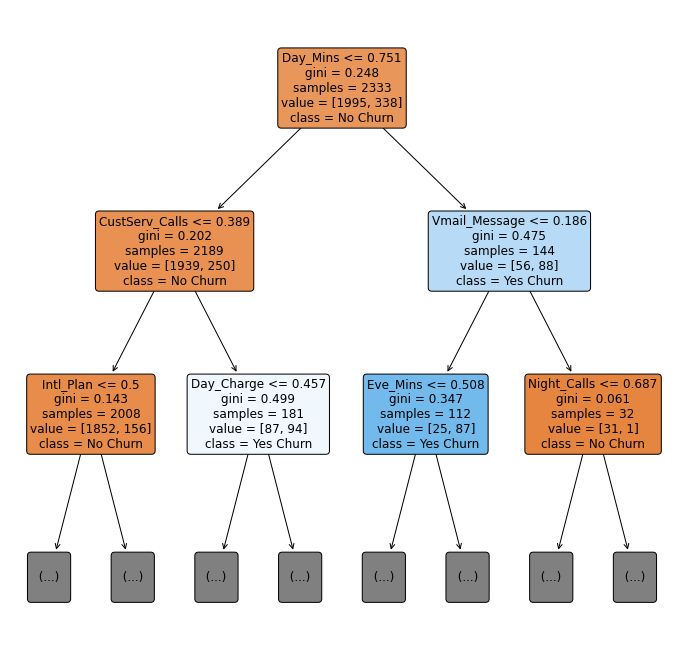

In [51]:
plt.figure(figsize = (12, 12))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["No Churn", "Yes Churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=12)

plt.show()

#### 6. Confusion Matrix, Classification report, and ROC-AUC

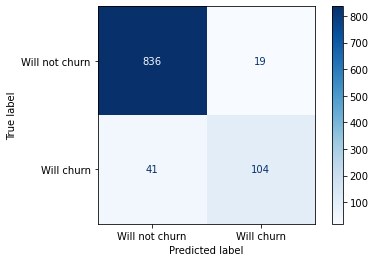

In [52]:
## Confusion matrix
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["Will not churn", "Will churn"],
                      cmap='Blues')
plt.show()

In [53]:
TPR = np.round(104/(104+41), 2)
FPR = np.round(19/(19+836), 2)
print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.72
False Positive Rate =  0.02


In [54]:
## Accuracy
accuracy = accuracy_score(y_test, y_pred_DT)
print('Accuracy: ', accuracy)

## Classification report
clr = classification_report(y_test, y_pred_DT)
print("Classification Report: \n", clr)

Accuracy:  0.94
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       855
         1.0       0.85      0.72      0.78       145

    accuracy                           0.94      1000
   macro avg       0.90      0.85      0.87      1000
weighted avg       0.94      0.94      0.94      1000



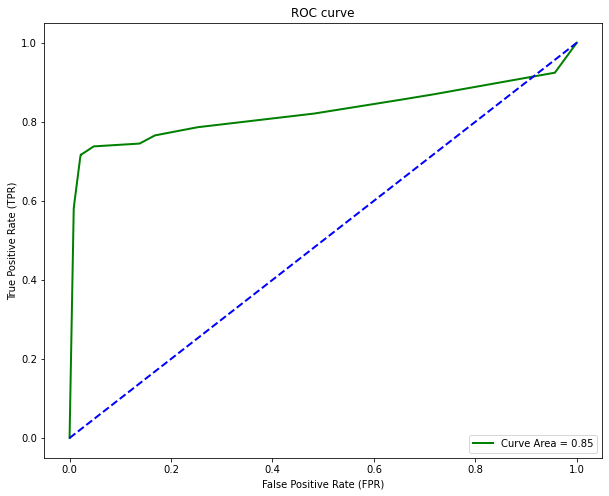

In [55]:
## roc_auc curve
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, y_pred_DT), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### 7. Explain accuracy, precision, recall, f1 score

- The Overall performance of the model was very well. The model accuaracy was about 94%, and most importantly average model precision, Recall and f1 score were 0.90, 0.85 and 0.87%, respectively, those are much higher. Beside, from ROC curve True Positive Rate was greater (0.72) than False Positive Rate (0.02). So, we can say that decisition tree classifier performed fairly well in deciding whether customers will churn or not in the 'Churn' data set. 